In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [3]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [5]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [9]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
train_history = model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4411 - acc: 0.8820 - val_loss: 0.2186 - val_acc: 0.9405
Epoch 2/10
 - 1s - loss: 0.1915 - acc: 0.9454 - val_loss: 0.1564 - val_acc: 0.9553
Epoch 3/10
 - 1s - loss: 0.1363 - acc: 0.9613 - val_loss: 0.1271 - val_acc: 0.9640
Epoch 4/10
 - 1s - loss: 0.1037 - acc: 0.9702 - val_loss: 0.1134 - val_acc: 0.9674
Epoch 5/10
 - 1s - loss: 0.0820 - acc: 0.9771 - val_loss: 0.0989 - val_acc: 0.9710
Epoch 6/10
 - 1s - loss: 0.0668 - acc: 0.9814 - val_loss: 0.0941 - val_acc: 0.9722
Epoch 7/10
 - 1s - loss: 0.0551 - acc: 0.9853 - val_loss: 0.0913 - val_acc: 0.9735
Epoch 8/10
 - 1s - loss: 0.0466 - acc: 0.9874 - val_loss: 0.0835 - val_acc: 0.9763
Epoch 9/10
 - 1s - loss: 0.0385 - acc: 0.9899 - val_loss: 0.0825 - val_acc: 0.9763
Epoch 10/10
 - 1s - loss: 0.0322 - acc: 0.9915 - val_loss: 0.0817 - val_acc: 0.9759


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

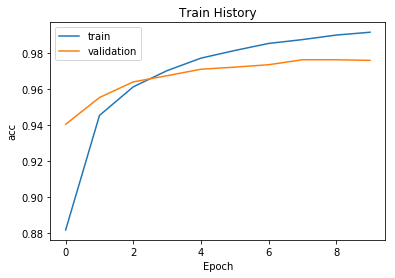

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

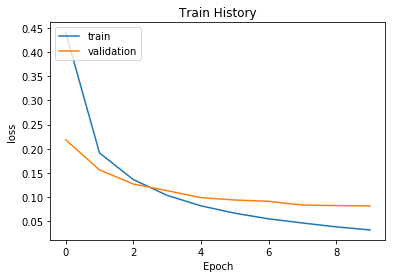

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print('accuracy = ',scores[1])

10000/10000 [==============================] - 0s 20us/step
accuracy =  0.9753


In [25]:
prediction = model.predict_classes(x_test)

In [26]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1125,3,0,0,1,2,0,4,0
2,5,0,1008,2,1,0,2,4,10,0
3,0,0,4,992,0,0,0,4,6,4
4,0,0,5,1,960,0,3,1,3,9
5,3,0,0,15,1,851,7,1,10,4
6,6,3,2,1,3,3,938,0,2,0
7,1,5,12,6,1,0,0,988,6,9
8,5,0,3,6,1,1,1,2,954,1


In [29]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [30]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4355,5,3


In [32]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " +str(labels[idx])
        if len(prediction) > 0:
            title += ",predict = " +str(prectiction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

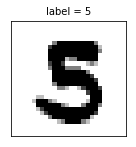

In [36]:
plot_images_labels_prediction(x_test_image, y_test_label, [], idx=1003, num=1)